In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

# Определяем распределение Парето.

Исходя из формул на википедии, посчитаем дисперсию и мат ожидание для нашего распределения.

In [2]:
xm = 1 # Коэф масштаба поумолчанию в scipy равен 1
k = 4 # Коэф кривизны > 2, чтобы посчитать дисперсию
E = (xm * k) / (k - 1)# Среднее
D = (E ** 2)*(k / (k - 2))# Дисперсия

pareto = sts.pareto(b = k)

## Сгенерируем выборку объёма 1000 из распределения Парето.

In [3]:
sample = pareto.rvs(1000)

## Построим гистограмму выборки, а так же отобразим теоретическую плотность распределения.

/home/rvg77/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, '$x$')

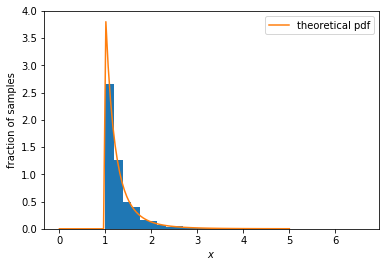

In [4]:
x = np.linspace(0, 5, 100) # Массив точек для построения плотности распределения
pdf = pareto.pdf(x) # Вычисляем значения плотности распределения от выборки

plt.hist(sample, bins = 30, normed = True) # Строим гистрограмму выборки
plt.plot(x, pdf, label ='theoretical pdf') # Строим теоретическую функцию распределения

plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Оценим распределение выборочного среднего случайной величины при разных объёмах выборок.

### Создадим функцию для постоения  гистограмм.

In [5]:
def histogram(n):
    data = np.array([]) # Массив выборочных средних
    i = 1
    
    while i <= 1000: # Генерация случайных выборок из функции
        sample = pareto.rvs(n)# Генерация выборки
        mean = sum(sample) / n # Оределение выборочного среднего
        data = np.append(data, mean)# Добавляем в массив новое значение
        i += 1
    
    D_N = D / n # Дисперсия приближающего выборку средних для нормального распределения
    SIGMA_N = math.sqrt(D_N) # Cигма для нормального распределения выборки средних
    NORM_N = sts.norm(E, SIGMA_N) # Нормальное распределение с расчетными характеристиками Парето
    PDF_N = NORM_N.pdf(x) # Пплотность распределения
    
    plt.plot(x, PDF_N, label = 'PDF')
    plt.hist(data, bins = 50, normed = True)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend()

### При n = 5

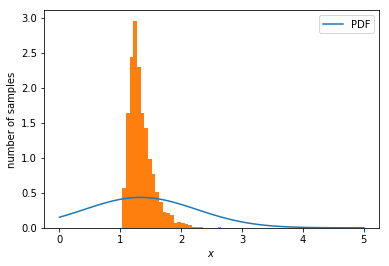

In [6]:
histogram(n = 5)

### При n = 10

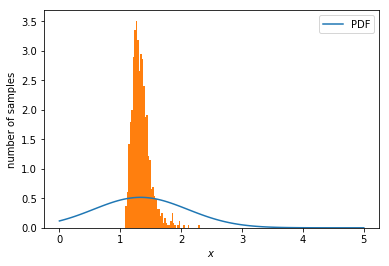

In [7]:
histogram(n = 10)

### При n = 50

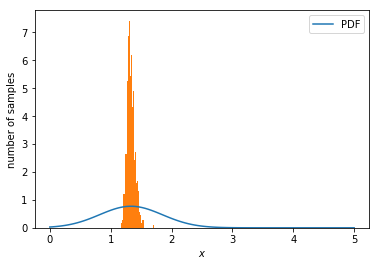

In [8]:
histogram(n = 50)

### При n = 100

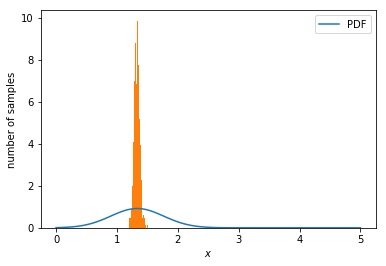

In [9]:
histogram(n = 100)

### При n = 300

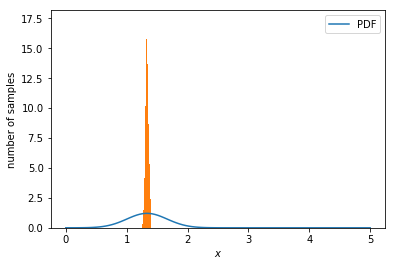

In [10]:
histogram(n = 300)

### При n = 1000

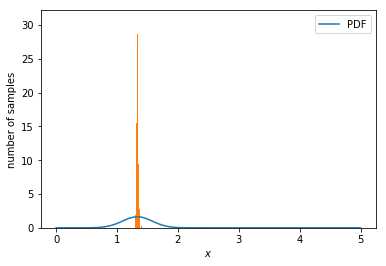

In [11]:
histogram(n = 1000)

# Выводы.

В данном случае мы рассмотрели функцию распределения Парето. Для разных n мы получили выборки объемом 1000, а так же построили гистограммы их выборочных средних. 

Анализируя графики мы приходим к выводу — с увеличением n улучшается точность аппроксимации. В случае работы с функций Парето мы замечаем скошенность в нашем распределении, из-за этого функция медленно сходится, луший результат наблюдается при n = 1000.